<h1>Approximation of Lorenz Attractor Series and the Rayleigh-Bénard Convection</h1>

<u>Code Imports</u>

In [2]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D

<h2>Introduction to the Lorenz Attractor Series</h2>
In this project, we will use the 4<sup>th</sup> Order Runge Kutta to approximate the set of <u>Lorenz Attractor</u> equations over a interval.  The Lorenz Attractor equations are used to describe the flow of uniform liquid in a 2D-space using the temperature difference across the liquid and its specific gravity.  By approximating this system, we can create a 3D surface from the <u>Rayleigh–Bénard convection</u> equations.  By modifying the 4<sup>th</sup> Order Runge Kutta to work with a system of three equations, we can approximate a large number of solutions to put into the Rayleigh–Bénard convection equations.

<b>Lorenz Equations</b>
$$f_{1}(x,y,z,t) = \frac{dx}{dt}=\sigma(y-x)$$
$$f_{2}(x,y,z,t) = \frac{dy}{dt}=x(\rho - z) - y$$
$$f_{3}(x,y,z,t) = \frac{dz}{dt}=xy-\beta z$$


<b>Rayleigh–Bénard Convection Equations</b>
$$\psi (x,z,t)=X(t)cos(\pi x)sin(qx)$$
<br>
$$\theta (x,z,t)=Y(t)cos(\pi z)sin(qx)+Z(t)sin(2\pi z)$$ 

<b>Stability Analysis</b>

In order to determine what conditions are needed for the Lorenz Attractor system to be stable, certain assertions were made.  It is asserted that σ = 10 and β = 8/3; these are the values of the constants when measuring flow of uniform liquid within Earth's atmosphere.  The leftover value, ρ, is therefore the main determinant of whether or not the system is stable.

To conduct stability analysis, we first need to find the critical points of the system.  The critical points of the Lorenz Attractor system can be found by determining for what values (x,y,z) the system equals zero.  These values will be left in terms of σ, β, and ρ.

$$\frac{dx}{dt}=\sigma(y-x) = 0$$
$$y-x = 0$$
$$x = y$$

$$\frac{dy}{dt}=-xz + \rho x - y = 0$$
$$-xz + \rho x - x = 0$$
$$x(\rho - z - 1) = 0$$
$$x = 0$$
$$ z = \rho - 1$$

$$\frac{dz}{dt}=xy - \beta z = 0$$
$$x^2 - \beta (\rho - 1) = 0$$
$$x^2 = \beta (\rho - 1)$$
$$ x = \pm \sqrt{\beta (\rho - 1)}$$

This process gives us two critical points.  These critical points change depending on what value of ρ is used for the system.  However, for ρ less than 1 we will get imaginary solutions, so instead we will focus on the critical point (0,0,0) for ρ = 1.

$$(\sqrt{\beta(\rho - 1)}, \sqrt{\beta(\rho - 1)}, \rho - 1)$$

$$(-\sqrt{\beta(\rho - 1)}, -\sqrt{\beta(\rho - 1)}, \rho - 1)$$

In order to determine the conditions for the system to be stable, we must determine the eigenvalues of the linearized  matrix of the system.  This is also known as the Jacobian matrix of the system: <u>J(x,y,z)</u>.

$$J(x,y,z) = \begin{bmatrix}
    \frac{\partial f_{1}}{\partial x}     & \frac{\partial f_{1}}{\partial y} & \frac{\partial f_{1}}{\partial z} \\
    \frac{\partial f_{2}}{\partial x}     & \frac{\partial f_{2}}{\partial y} & \frac{\partial f_{2}}{\partial z} \\
    \frac{\partial f_{3}}{\partial x}     & \frac{\partial f_{3}}{\partial y} & \frac{\partial f_{3}}{\partial z}
\end{bmatrix} = 
    \begin{bmatrix} -\sigma  &  \sigma  &  0 \\
    -z + \rho & -1  & -x  \\ 
    y  &  x  &  -\beta
\end{bmatrix}$$

Because (0,0,0) is the critical point we will be examining, we will find the eigenvalues of J(0,0,0).  For a three-by-three matrix, we expect to find at most three different eigenvalues.  The eigenvalues can be found by solving det(J - λI) = 0, where J is the Jacobian matrix and I is a three-by-three identity matrix.

$$J(0,0,0) = \begin{bmatrix} -\sigma  &  \sigma  &  0 \\
    \rho & -1  & 0  \\ 
    0  &  0  &  -\beta
\end{bmatrix} $$

$$det(J -\lambda I) = \begin{vmatrix} -\sigma - \lambda & \sigma & 0 \\
    \rho  & -1 - \lambda & 0 \\ 0 & 0 & -\beta - \lambda
    \end{vmatrix} = 0$$
    
$$det(J -\lambda I) = (-\beta - \lambda)\begin{vmatrix} -\sigma - \lambda & \sigma \\ \rho & -1 - \lambda \end{vmatrix} = 0$$

$$(-\beta - \lambda)[(-\sigma - \lambda)(-1 - \lambda) - \sigma \rho] = 0$$ 

$$(-\beta - \lambda)[\lambda^2 + (1 + \sigma) \lambda - \sigma (\rho - 1)] = 0$$

By examination, we can see that J(0,0,0) has an eigenvalue of negative β.  Because this value is always negative, it has no conditions that would affect the stability of the system.  However, there are two other eigenvalues left to examine - they can be found by using the quadratic formula on the polynomial within the brackets.

$$ \lambda _1  = -\beta$$

$$ \lambda _2 = \frac{-(1+\lambda) - \sqrt{(1 + \sigma)^2 -4(-\sigma(\rho - 1))}}{2} $$

$$ \lambda _3 = \frac{-(1+\lambda) + \sqrt{(1 + \sigma)^2 -4(-\sigma(\rho - 1))}}{2} $$

Applying the quadratic formula shows that our second value for λ is also always negative.  Our third value for λ, however, may be positive for certain values of ρ.  Because we asserted that σ = 10 and β = 8/3, then we can further simplify the third eigenvalue to determine what values of ρ make the system stable.

$$ \lambda _3 = \frac{-(1+\lambda) + \sqrt{(1 + \sigma)^2 -4(-\sigma(\rho - 1))}}{2} $$

$$ \lambda _3 = \frac{-11 + \sqrt{81 + 40\rho}}{2} $$

$$  -11 + \sqrt{81 + 40\rho} \leq 0 $$

$$ 81 + 40\rho \leq 121 $$

$$ \rho \leq 1 $$

Our final conclusion is that the system is stable as long as we use ρ ≤ 1.  In order to prove this, however, we will approximate the Lorenz system using the 4th Order Runge-Kutta method, and examining our results for varying values of ρ.

<h2>Lorenz System - RK4 Approximation</h2>
Shown below is the final product of testing a modified 4<sup>th</sup> Order Runge Kutta to fit a system of three equations.  

In [3]:
# Lorenz Values, modify values to modify system
# NOTE: Lorenz values are typically positive
# Lorenz Equations
Lx = lambda x,y,z: σ*(y - x)
Ly = lambda x,y,z: x*(ρ- z) - y
Lz = lambda x,y,z: x*y - β*z


In [4]:
def L(ω):
    # ω is an array containing values approximated values for x, y, z
    return Lx(ω[0],ω[1],ω[2]), Ly(ω[0],ω[1],ω[2]), Lz(ω[0],ω[1],ω[2])



# Specialized RK4 for Lorenz Equations

def L_RK4(a, b, α, N):
# INPUTS: Bounds a and b, initial values α, and sub-intervals N
# OUTPUTS: approximation of the functions fx, fy, fz
    h = (b-a)/N
    t = a
    ω = [α[0], α[1], α[2]]
    fx = [ω[0]]
    fy = [ω[1]]
    fz = [ω[2]]
    
    for j in range(1, N+1):
        # Find individual k values...
        
        k1x = h*Lx(ω[0],ω[1],ω[2])
        k1y = h*Ly(ω[0],ω[1],ω[2])
        k1z = h*Lz(ω[0],ω[1],ω[2])
        
        k2x = h*Lx(ω[0] + k1x/2, ω[1] + k1y/2,ω[2] + k1z/2)
        k2y = h*Ly(ω[0] + k1x/2, ω[1] + k1y/2,ω[2] + k1z/2)
        k2z = h*Lz(ω[0] + k1x/2, ω[1] + k1y/2,ω[2] + k1z/2)
    
        k3x = h*Lx(ω[0] + k2x/2, ω[1] + k2y/2, ω[2] + k2z/2)
        k3y = h*Ly(ω[0] + k2x/2, ω[1] + k2y/2, ω[2] + k2z/2)
        k3z = h*Lz(ω[0] + k2x/2, ω[1] + k2y/2, ω[2] + k2z/2)
        
        k4x = h*Lx(ω[0] + k3x, ω[1] + k3y, ω[2] + k3z)
        k4y = h*Ly(ω[0] + k3x, ω[1] + k3y, ω[2] + k3z)
        k4z = h*Lz(ω[0] + k3x, ω[1] + k3y, ω[2] + k3z)
        # Print out respective k values
        
        # Recalculate ω for next iteration
        ω[0] = ω[0] + (k1x + 2*k2x + 2*k3x + k4x)/6;
        ω[1] = ω[1] + (k1y + 2*k2y + 2*k3y + k4y)/6;
        ω[2] = ω[2] + (k1z + 2*k2z + 2*k3z + k4z)/6;
        
        fx.append(ω[0])
        fy.append(ω[1])
        fz.append(ω[2])
        
    return fx, fy, fz


In [5]:
# range of t values
a = 0; b = 20
# initial value for IVPs
α = [1,1,1]
# number of subintervals used to approximate equations
N = 2000

<u><h4> Lorenz Equations Case 2:  0 < ρ < 1 </h4><u>
    $$ \rho = 0.5,  \sigma = 10,  \beta = 8/3 $$

Tested ρ: 0.5
Tested σ: 10
Tested β: 2.6666666666666665


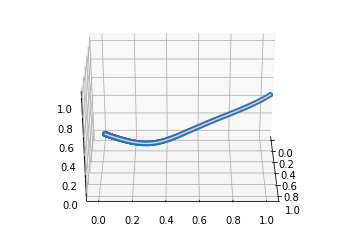

In [6]:
ρ = 0.5; σ = 10; β = 8/3
# Y = L_RK4(a,b,α,N)
# ax = plt.axes(projection='3d');

Y = L_RK4(a,b,α,N)
plt.figure(); ax = plt.axes(projection='3d');

# Change degrees of rotation:
ax.view_init(30,0)
ax.plot3D(Y[0],Y[1],Y[2], 'pink'); ax.scatter3D(Y[0], Y[1], Y[2])


print ("Tested ρ:", ρ); print ("Tested σ:", σ); print ("Tested β:", β)


According to our stability analysis, our system is stable for positive ρ less than 1.  In other words, for very small ρ values (0 < ρ < 1) the system is stable.  Thus, in this example, we see our system begin to approach a single point in 3D space.  

<u><h4> Lorenz Equations Case 3:  0 < ρ < 20 </h4></u>
    $$ \rho = 10,  \sigma = 10,  \beta = 8/3 $$

Tested ρ: 10
Tested σ: 10
Tested β: 2.6666666666666665


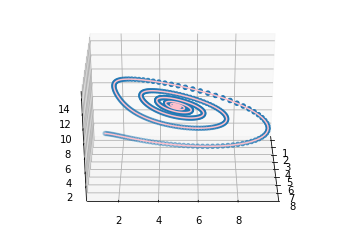

In [7]:
ρ = 10
Y = L_RK4(a,b,α,N)
plt.figure(); ax = plt.axes(projection='3d');

# Change degrees of rotation:
ax.view_init(30,0)
ax.plot3D(Y[0],Y[1],Y[2], 'pink'); ax.scatter3D(Y[0], Y[1], Y[2])


print ("Tested ρ:", ρ); print ("Tested σ:", σ); print ("Tested β:", β)

For values of ρ greater than one (0 > p > 20) the system is no longer stable.  Thus, the system no longer approaches a single value.  Instead, we see the system forms a spiral which is attracted to a certain point in 3D space

<u><h4> Lorenz Equations Case 1: ρ = 28 </h4></u>
    $$ \rho = 28,  \sigma = 10,  \beta = 8/3 $$

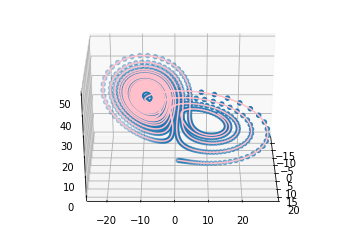

In [8]:
ρ = 28; 
Y = L_RK4(a,b,α,N)
fig = plt.figure(); ax = plt.axes(projection='3d');

# Change degrees of rotation:
ax.view_init(30,0)
ax.plot3D(Y[0],Y[1],Y[2], 'pink'); ax.scatter3D(Y[0], Y[1], Y[2])


At ρ = 28, we get a special result of the Lorenz Attractor equations.  The system, again, is unstable for values of ρ greater than 1.  However, instead of a single spiral forming around a point of attraction, the system displays complex, chaotic behavior.

<h2>Introduction to Rayleigh–Bénard Convection</h2>
Using the approximations we calculated in the previous part, we can begin to calculate outputs for the Rayleigh–Bénard Convection equations.

In [9]:
π = math.pi
q = π/(math.sqrt(2))

ψ = lambda x,z,t: Y[0][t]*np.matmul(np.cos(π*z),np.sin(q*x))
θ = lambda x,z,t: Y[1][t]*np.matmul(np.cos(π*z),np.sin(q*x)) + Y[2][t]*np.sin(2*π*z)


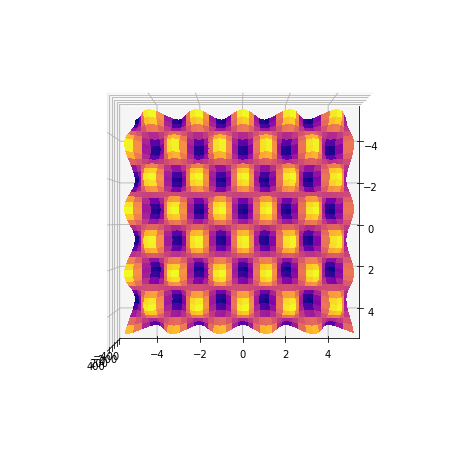

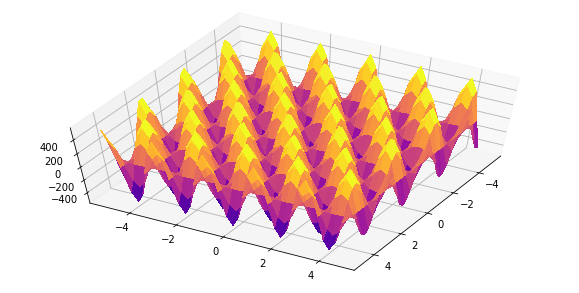

In [12]:
ρ = 28; 
Y = L_RK4(a,b,α,N)
          
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.view_init(90,0)
Xp = np.arange(-5, 5, 0.25)
Zp= np.arange(-5, 5, 0.25)
Xp, Zp = np.meshgrid(Xp, Zp)
ax.plot_surface(Xp, Zp, θ(Xp,Zp,20), rstride=1, cstride=1, cmap=plt.get_cmap('plasma'), linewidth=0, antialiased=False)
plt.show()

fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.view_init(60,30)
ax.plot_surface(Xp, Zp, θ(Xp,Zp,20), rstride=1, cstride=1, cmap=plt.get_cmap('plasma'), linewidth=0, antialiased=False)
plt.show()

<h2>Sources</h2>

<ul>
    <li>https://en.wikipedia.org/wiki/Lorenz_system</li>
    <li>https://ipywidgets.readthedocs.io/en/stable/examples/Lorenz%20Differential%20Equations.html</li>
    <li>http://www.scholarpedia.org/article/Rayleigh-B%C3%A9nard_convection</li>
</ul>


<u>Update Notes</u>

In [11]:
# 10/16/2018 - Modified k_Mult; removed h from Ω calculation into return statements
# 10/18/2018 - Modified L_RK4; allocated x(t), y(t), and z(t) seperately to produce accurate results
# 10/29/2018 - Modified L_RK4 to original form, now producing expected results
# 11/07/2018 - Added individual cases for the different values of ρ
# 11/08/2018 - Began experimenting with widgets to display ρ values more effectively
# 12/03/2018 - Added additional cells to output list of specific test outputs
# 12/30/2018 - Added first draft of introduction... more information to follow
# 1/04/2019 - Added first draft of results... To add more when more results are found
# 1/11/2019 - Modified notebook to include Rayleigh–Bénard Convection equations, observations
# 1/21/2019 - Reorganized notebook, check formatting for possible errors. 
#             Removed extraneous cells and debugging outputs
# 2/27/2019 - Finished drafting the first part of the notebook report, on Lorenz Equations.  Second part in progress.